In [1]:
import pandas as pd

In [2]:
females_behance=pd.read_excel("data_check_gender_female.xlsx")
male_behance=pd.read_excel("data_check_gender.xlsx")

In [52]:
45/400

0.1125

In [3]:
B=females_behance.append(male_behance)

In [4]:
G=pd.read_excel('/Users/orsi/Dropbox/behance-data/NEW_ANALYSIS/data/sampled_users_for_gender_inferring_BALAZS.xlsx')

In [5]:
# GET USERS NAME FROM GITHUB
import requests
import json

####
# inputs
####
owner = 'velf'

# from https://github.com/user/settings/tokens
access_token = '7e93cd6ec456aa7cbbbd259f09362a448ae16b3f '

#url = "https://api.github.com"

headers = {'Authorization':"Token "+access_token}

# get the list of repos belonging to me
#repos = json.loads(gh_session.get(repos_url).text)

    
# make more requests using "gh_session" to create repos, list issues, etc.

In [ ]:
alistaire47

In [6]:
all_contributors=[] # create an empty coontainer
for repo_name in all_repo_names:
    url = f"https://api.github.com/repos/{owner}/{repo_name}/contributors"
# make the request and return the json
    contributors= requests.get(url,headers=headers).json()
    all_contributors.append(contributors)

NameError: name 'all_repo_names' is not defined

In [7]:
from collections import defaultdict

In [11]:
users=defaultdict(str)
for github_user in list(G['userlogin']):
    url=f"https://api.github.com/users/{github_user}" 
    a=requests.get(url,headers=headers).json()
    try:
        users[a['login']]=a['name']
    except:
        pass

In [12]:
names=pd.DataFrame.from_dict(users, 'index')

In [13]:
names.rename(columns={0:'full_name'})

,full_name
alistaire47,Edward Visel
pbrooker,Paul Brooker
SoukainaEZZAMANE,Soukaina EZZAMANE
KinglyKrab,Alex
drokita,None
...,...
Trude,Trude M. Kristoffersen
NeoTeo,Teo Sartori
kschmidt2,Kiersten Schmidt
mwvd,Mackenzie Davidson


In [14]:
G['gender_manual']=G['gender_manual'].replace(0, 'unknown').replace("unknwon", 'unknown')

In [15]:
G=G.set_index('userlogin').join(names.rename(columns={0:'full_name'}))

In [16]:
import gender_guesser.detector as gender

In [17]:
d = gender.Detector()

In [18]:
def get_gender(row):
    try:
        return d.get_gender(row['full_name'].split(' ')[0])
    except:
        return "unknown"

In [19]:
G['gender_guesser']=G.apply(get_gender,1)

In [20]:
G['gender_guesser'].value_counts()

unknown          249
male             193
female           121
mostly_male       16
andy              14
mostly_female      7
Name: gender_guesser, dtype: int64

In [21]:
G['gender_guesser']=G['gender_guesser'].replace('mostly_male','male').replace("mostly_female", 'female' ).replace("andy", 'unknown' )

In [22]:
B

,user_id,display_name,username,first_name,last_name,country,gender_manual,gender
0,1981771,NaN,NyChevannes,NaN,NaN,United Kingdom,unknown,female
1,8858791,NaN,Usmihnena,NaN,NaN,Ukraine,unknown,female
2,138799,Zuzanna Kucharska,zuza3D,Zuzanna,Kucharska,United Kingdom,female,female
3,219409,Julia Molares,moloka,Julia,Molares,Argentina,female,female
4,16259833,Kana Urbanowicz,kanapeco,Kana,Urbanowicz,Japan,female,female
...,...,...,...,...,...,...,...,...
195,2947041,Domenico Nicoletti,domeniconicoletti,Domenico,Nicoletti,Italy,male,male
196,9617845,youssef yasin,Youssef-y-Designs,youssef,yasin,Egypt,male,male
197,41348661,hosny mabrouk,hosnymabro3369,hosny,mabrouk,Egypt,male,male
198,130670,Ross Burwell,rossburwell,Ross,Burwell,United States,male,male


In [23]:
def get_gender2(row):
    try:
        return d.get_gender(row['display_name'].split(' ')[0])
    except:
        return "unknown"

In [24]:
B['gender_guesser']=B.apply(get_gender2,1)

In [25]:
B['gender_guesser']=B['gender_guesser'].replace('mostly_male','male').replace("mostly_female", 'female' ).replace("andy", 'unknown' )

In [26]:
B['gender_guesser'].value_counts()

female     137
male       137
unknown    126
Name: gender_guesser, dtype: int64

# New_genders B.xlsx

In [27]:
import numpy as np

In [28]:
def create_df(precision, recall, fscore, support, method_name):
    df=pd.DataFrame()
    df['Precision']=precision
    df['Recall']=recall
    df['F score']=fscore
    df['Support']=support
    df.index=['Female', 'Male', 'Unknown']
    df['Method']=method_name
    return df

In [29]:
from sklearn.metrics import precision_recall_fscore_support as score

predicted = B['gender'] 
y_test = B['gender_manual']

precision, recall, fscore, support = score(y_test, predicted)
df2=create_df(precision, recall, fscore, support, "Gender API")
print('             female,       male,       unknown')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


             female,       male,       unknown
precision: [0.91 0.86 0.  ]
recall: [0.99453552 1.         0.        ]
fscore: [0.95039164 0.92473118 0.        ]
support: [183 172  45]


/Users/orsi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
predicted = B['gender_guesser'] 
y_test = B['gender_manual']

precision, recall, fscore, support = score(y_test, predicted)
df2_=create_df(precision, recall, fscore, support, "Gender Guesser,\nPython Package")
print('             female,       male,       unknown')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

             female,       male,       unknown
precision: [0.97810219 0.97810219 0.34126984]
recall: [0.73224044 0.77906977 0.95555556]
fscore: [0.8375     0.86731392 0.50292398]
support: [183 172  45]


In [31]:
predicted = G['gender'] 
y_test = G['gender_manual']

precision, recall, fscore, support = score(y_test, predicted)
df3=create_df(precision, recall, fscore, support, "Vedres-Vasarhelyi,2019")
print('             female,       male,       unknown')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

             female,       male,       unknown
precision: [0.69 0.9  0.56]
recall: [0.93243243 0.6360424  0.66272189]
fscore: [0.79310345 0.74534161 0.60704607]
support: [148 283 169]


In [32]:
predicted = G['gender_guesser'] 
y_test = G['gender_manual']

precision, recall, fscore, support = score(y_test, predicted)
df3_=create_df(precision, recall, fscore, support, "Gender Guesser,\nPython Package")
print('             female,       male,       unknown')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

             female,       male,       unknown
precision: [0.875      0.93301435 0.57794677]
recall: [0.75675676 0.68904594 0.89940828]
fscore: [0.8115942  0.79268293 0.7037037 ]
support: [148 283 169]


In [33]:
import matplotlib.pyplot as plt
%matplotlib  inline

In [34]:
df3.head()

,Precision,Recall,F score,Support,Method
Female,0.69,0.932432,0.793103,148,"Vedres-Vasarhelyi,2019"
Male,0.90,0.636042,0.745342,283,"Vedres-Vasarhelyi,2019"
Unknown,0.56,0.662722,0.607046,169,"Vedres-Vasarhelyi,2019"


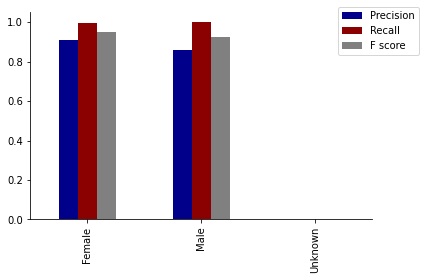

In [35]:
import seaborn as sns
df2[["Precision","Recall","F score"]].plot(kind="bar", color=['darkblue', 'darkred', "grey"])
sns.despine()
plt.legend(ncol=1, bbox_to_anchor=(1.15, 1.05))
plt.tight_layout()
plt.savefig('Precision_Recall.pdf')

In [36]:
#pal=['darkblue', 'darkred', "grey"]

In [37]:
df4=df2.append(df2_)

In [38]:
df5=df3.append(df3_)
df5['Gender']=df5.index

In [39]:
df4['Gender']=df4.index

In [40]:
df4

,Precision,Recall,F score,Support,Method,Gender
Female,0.910000,0.994536,0.950392,183,Gender API,Female
Male,0.860000,1.000000,0.924731,172,Gender API,Male
Unknown,0.000000,0.000000,0.000000,45,Gender API,Unknown
Female,0.978102,0.732240,0.837500,183,"Gender Guesser,\nPython Package",Female
Male,0.978102,0.779070,0.867314,172,"Gender Guesser,\nPython Package",Male
Unknown,0.341270,0.955556,0.502924,45,"Gender Guesser,\nPython Package",Unknown


In [45]:
pal=['#44AA99', 'grey']


#pal=sns.xkcd_palette(['#44AA99', 'gray'])

In [46]:
pal2=['indianred', 'grey']

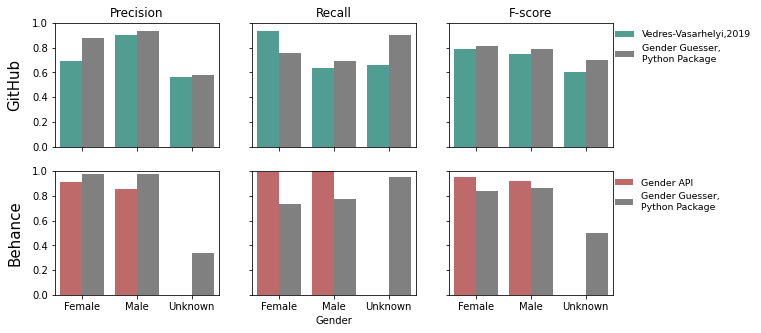

In [48]:
f, axes = plt.subplots(2, 3, sharey=True, sharex=True,  figsize=(10,5))
#f.suptitle("Precision, recall and F score of gender inferring algorithms", fontsize=18)

sns.barplot(x="Gender", y="Precision", hue="Method",
                  data=df4, ax=axes[1][0], palette=pal2)

sns.barplot(x="Gender", y="Recall", hue="Method",
                  data=df4, ax=axes[1][1], palette=pal2)

sns.barplot(x="Gender", y="F score", hue="Method",
                  data=df4, ax=axes[1][2], palette=pal2)
plt.ylim(0,1)

#grid.axes[0][0].legend()
axes[1][2].legend(bbox_to_anchor=(1.70, 1.01), loc=1, prop={'size': 9.4}, frameon=False)
axes[1][1].legend("", bbox_to_anchor=(2.05, 1))
axes[1][0].legend("", bbox_to_anchor=(2.05, 1))

#axes[0].title.set_position([0., 1.01])
axes[0][0].title.set_text('Precision')
#axes[1].title.set_position([0., 1.01])
axes[0][1].title.set_text('Recall')
#axes[2].title.set_position([0., 1.01])
axes[0][2].title.set_text('F-score')

axes[0][0].set_xlabel('.', color=(0, 0, 0, 0))
axes[0][2].set_xlabel('.', color=(0, 0, 0, 0))
axes[1][0].set_xlabel('.', color=(0, 0, 0, 0))
axes[1][2].set_xlabel('.', color=(0, 0, 0, 0))

sns.barplot(x="Gender", y="Precision", hue="Method",
                  data=df5, ax=axes[0][0], palette=pal)

sns.barplot(x="Gender", y="Recall", hue="Method",
                  data=df5, ax=axes[0][1], palette=pal)

sns.barplot(x="Gender", y="F score", hue="Method",
                  data=df5, ax=axes[0][2], palette=pal)

axes[0][2].legend(bbox_to_anchor=(1.89, 1.01), loc=1, prop={'size': 9.4}, frameon=False)
axes[0][1].legend("", bbox_to_anchor=(2.05, 1))
axes[0][0].legend("", bbox_to_anchor=(2.05, 1))


axes[0][0].yaxis.set_label_coords(-.2, 0.5)
axes[1][0].yaxis.set_label_coords(-.2, 0.5)
axes[0][0].set_ylabel("GitHub", fontsize=15)
axes[1][0].set_ylabel('Behance', fontsize=15)

axes[0][1].set_xlabel('')
axes[1][1].set_ylabel('')
axes[0][1].set_ylabel("")
axes[1][2].set_ylabel('')
axes[0][2].set_ylabel("")


#f.tight_layout()
#plt.savefig('Gender_inferring.pdf', bbox_inches='tight')
#plt.savefig('Gender_inferring.png', bbox_inches='tight')


#ax[0].set_ylabel('.', color=(0, 0, 0, 0))
#f.title("Precision and Recall of Gender Inferring Algorithms", loc="left")
plt.savefig('/Users/orsi/Dropbox/behance-data/NEW_ANALYSIS/Precision_Recall.pdf', bbox_inches='tight')

In [ ]:
f, axes = plt.subplots(1, 3, sharey=True, sharex=True,  figsize=(10,5))
#f.suptitle("Precision, recall and F score of gender inferring algorithms", fontsize=18)

sns.barplot(x="Gender", y="Precision", hue="Method",
                  data=df4, ax=axes[0], palette=pal)

sns.barplot(x="Gender", y="Recall", hue="Method",
                  data=df4, ax=axes[1], palette=pal)

sns.barplot(x="Gender", y="F score", hue="Method",
                  data=df4, ax=axes[2], palette=pal)
plt.ylim(0,1)

#grid.axes[0][0].legend()
axes[2].legend(bbox_to_anchor=(1.5, 1.01), loc=1, prop={'size': 9.4}, frameon=False)
axes[1].legend("", bbox_to_anchor=(2.05, 1))
axes[0].legend("", bbox_to_anchor=(2.05, 1))

#axes[0].title.set_position([0., 1.01])
#axes[0].title.set_text('Precision')
#axes[1].title.set_position([0., 1.01])
#axes[1].title.set_text('Recall')
#axes[2].title.set_position([0., 1.01])
#axes[2].title.set_text('F-score')

axes[0].set_xlabel('.', color=(0, 0, 0, 0))
axes[2].set_xlabel('.', color=(0, 0, 0, 0))
#f.tight_layout()
plt.savefig('Gender_inferring.pdf', bbox_inches='tight')
plt.savefig('Gender_inferring.png', bbox_inches='tight')


#ax[0].set_ylabel('.', color=(0, 0, 0, 0))
#f.title("Precision and Recall of Gender Inferring Algorithms", loc="left")
#plt.savefig("Precision_Recall_cop.pdf")

In [44]:
df["Good"].value_counts()

Male       66
Female     28
Unknown     6
Name: Good, dtype: int64

In [90]:
pd.DataFrame.from_dict([{g:s} for (g,s) in list(zip(("female","male","unknown"), precision))]).T

,0,1,2
female,0.956522,NaN,NaN
male,NaN,1.0,NaN
unknown,NaN,NaN,0.272727


In [91]:
predicted = nb2['simple_gender2'] 
y_test = nb2['cons_clean']

precision, recall, fscore, support = score(y_test, predicted)
df2=create_df(precision, recall, fscore, support, "Ford, 2017")
print('             female,       male,       unknown')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

NameError: name 'nb2' is not defined

In [375]:
df2

,Precision,Recall,F score,Support,Method
Female,0.836478,0.852564,0.844444,156,"Ford, 2017"
Male,0.934211,0.710000,0.806818,300,"Ford, 2017"
Unknown,0.485549,0.807692,0.606498,104,"Ford, 2017"


In [376]:
nb2['gender_computer']=nb2['gender_computer'].replace(np.nan,'unknown')
nb2['gender_computer']=nb2['gender_computer'].replace('unisex','unknown')

/Users/orsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/orsi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [377]:
predicted = nb2['gender_computer'] 
y_test = nb2['cons_clean']

precision, recall, fscore, support = score(y_test, predicted)
df3=create_df(precision, recall, fscore, support, "Vasilescu, 2012")
print('             female,       male,       unknown')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

             female,       male,       unknown
precision: [0.56175299 0.93073593 0.3974359 ]
recall: [0.90384615 0.71666667 0.29807692]
fscore: [0.69287469 0.80979284 0.34065934]
support: [156 300 104]


In [378]:
cols=["precision","recall","fscore"]

In [382]:
df4=df1.append(df2).append(df3)

In [383]:
df4['Gender']=df4.index

In [384]:
df4

,Precision,Recall,F score,Support,Method,Gender
Female,0.765957,0.923077,0.837209,156,Our method,Female
Male,0.948718,0.616667,0.747475,300,Our method,Male
Unknown,0.435028,0.740385,0.548043,104,Our method,Unknown
Female,0.836478,0.852564,0.844444,156,"Ford, 2017",Female
Male,0.934211,0.710000,0.806818,300,"Ford, 2017",Male
Unknown,0.485549,0.807692,0.606498,104,"Ford, 2017",Unknown
Female,0.561753,0.903846,0.692875,156,"Vasilescu, 2012",Female
Male,0.930736,0.716667,0.809793,300,"Vasilescu, 2012",Male
Unknown,0.397436,0.298077,0.340659,104,"Vasilescu, 2012",Unknown


In [385]:
import seaborn as sns

In [24]:
pal=sns.xkcd_palette(["orange", "grey", 'silver'])

In [96]:
sns.set_context(rc={"lines.linewidth": 2.5})

/Users/orsi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


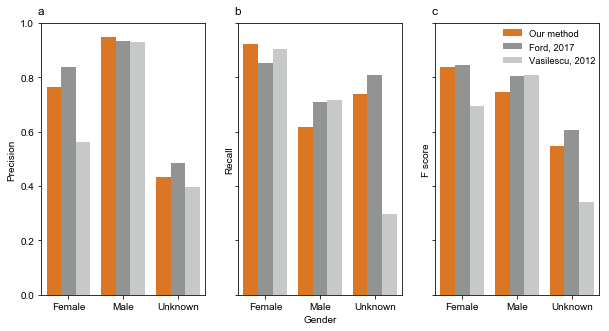

In [397]:
f, axes = plt.subplots(1, 3, sharey=True, sharex=True,  figsize=(10,5))
#f.suptitle("Precision, recall and F score of gender inferring algorithms", fontsize=18)

sns.barplot(x="Gender", y="Precision", hue="Method",
                  data=df4, ax=axes[0], palette=pal)

sns.barplot(x="Gender", y="Recall", hue="Method",
                  data=df4, ax=axes[1], palette=pal)

sns.barplot(x="Gender", y="F score", hue="Method",
                  data=df4, ax=axes[2], palette=pal)
plt.ylim(0,1)

#grid.axes[0][0].legend()
axes[2].legend(bbox_to_anchor=(1.032, 1.01), loc=1, prop={'size': 9.4}, frameon=False)
axes[1].legend("", bbox_to_anchor=(2.05, 1))
axes[0].legend("", bbox_to_anchor=(2.05, 1))

axes[0].title.set_position([0., 1.01])
axes[0].title.set_text('a')
axes[1].title.set_position([0., 1.01])
axes[1].title.set_text('b')
axes[2].title.set_position([0., 1.01])
axes[2].title.set_text('c')

axes[0].set_xlabel('.', color=(0, 0, 0, 0))
axes[2].set_xlabel('.', color=(0, 0, 0, 0))
#f.tight_layout()
plt.savefig('Gender_inferring.pdf', bbox_inches='tight')
plt.savefig('Gender_inferring.png', bbox_inches='tight')

#ax[0].set_ylabel('.', color=(0, 0, 0, 0))
#f.title("Precision and Recall of Gender Inferring Algorithms", loc="left")


In [330]:
sns.set_style({'font.family': ['Arial']})

In [286]:
nb['cons_clean'].value_counts()

male       300
female     156
unknown    104
0           40
Name: cons_clean, dtype: int64

In [259]:
nb['user']=nb.index

In [261]:
len(nb)

605

In [250]:
40/600*100

6.666666666666667

In [254]:
len(nb[nb["O"]!=nb["B"]])/600

0.12166666666666667

In [393]:
nb2.head()

,B,O,simple_gender2,gender_computer,gender,MISMATCH,consensus,cons_clean,user
1NESLEiN,1,1,male,male,male,0,NaN,male,1NESLEiN
A440251,3,3,unknown,female,unknown,0,NaN,unknown,A440251
AdriVC,2,2,unknown,female,unknown,0,NaN,female,AdriVC
AlexMitan,1,1,male,male,male,0,NaN,male,AlexMitan
Almazzzzz,1,2,female,female,female,1,female,female,Almazzzzz


In [355]:
pd.crosstab(nb2['gender'], nb2['cons_clean'])

cons_clean,female,male,unknown
gender,,,
female,144,26,18
male,1,185,9
unknown,11,89,77


In [358]:
27 / (27+144 +185)*100


7.584269662921349